# Standardizing Stock Data

In this activity, you’ll use the `StandardScaler` module and clustering optimization techniques to cluster stocks. The purpose of clustering the stocks will be to define a portfolio investment strategy.

Instructions

1. Read in the `tsx-energy-2018.csv` file from the `Resources` folder and create the DataFrame. Make sure to set the `Ticker` column as the DataFrame’s index. Then review the DataFrame.

    > **Note** The stock data that’s provided for this activity contains the yearly mean prices (open, high, low, and close), volume, annual return, and annual variance from companies in the energy sector that the TSX lists.

2. To prepare the data, use the `StandardScaler` module and the `fit_transform` function to scale all the columns containing numerical values. Review a five-row sample of the scaled data using bracket notation ([0:5]).

3. Create a new DataFrame called `df_stocks_scaled` that contains the scaled data. Make sure to do the following: 

    - Use the same labels that were referenced in the `StandardScaler` for the column names. 
    - Add a column to the DataFrame that consists of the tickers from the original DataFrame. (Hint: This column was the index). 

    - Set the new column of tickers as the index for the new DataFrame. 

    - Review the resulting DataFrame. 

4. Encode the “EnergyType” column using `pd.get_dummies`, and save the result in a separate DataFrame called `df_oil_dummies`. Note that, because the company name isn’t relevant for clustering, you don’t need to encode the “CompanyName” column.

5. Using the `pd.concat` function, concatenate the `df_stocks_scaled` DataFrame with the `df_oil_dummies` DataFrame, along an axis value of 1 (`axis=1` tells Pandas to join the data horizontally by columns). Review the concatenated DataFrame. 

6. Using the concatenated DataFrame, cluster the data by using the K-means algorithm and a k value of 3. Create a copy of the concatenated DataFrame, and add the resulting list of company segment values as a new column. 



References

[scikit-learn StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

[scikit-learn Preprocessing Data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)

[Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

[scikit-learn Python Library](https://scikit-learn.org)

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Step 1: Read in the `tsx-energy-2018.csv` file from the `Resources` folder and create the DataFrame. Make sure to set the `Ticker` column as the DataFrame’s index. Then review the DataFrame.

In [9]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
pt = '../Resources/tsx-energy-2018.csv'
df_stocks = pd.read_csv(pt, index_col='Ticker')

# Review the DataFrame
# YOUR CODE HERE
df_stocks.head(5)

,CompanyName,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,EnergyType
Ticker,,,,,,,,,
ARX,ARC Resources Ltd.,13.14,13.34,12.91,13.10,1479913.38,-0.7275,0.3590,Oil
CCO,Cameco Corporation,13.70,13.92,13.50,13.70,1203788.22,0.2014,0.3693,Other Energy
CNQ,Canadian Natural Resources Limited,41.97,42.46,41.46,41.91,3218248.68,-0.3461,0.2947,Oil
CVE,Cenovus Energy Inc.,11.96,12.18,11.75,11.95,4566143.56,-0.3219,0.4500,Oil
CPG,Crescent Point Energy Corp.,8.53,8.67,8.36,8.50,3919414.03,-1.0103,0.4597,Other Energy


## Step 2: To prepare the data, use the `StandardScaler` module and the `fit_transform` function to scale all the columns containing numerical values. Review a five row sample of the scaled data using bracket notation ([0:5]).

In [34]:
# Use the StandardScaler module and fit_transform function to 
# scale all columns with numerical values
stock_data_scaled = StandardScaler().fit_transform(df_stocks[['MeanOpen', 'MeanHigh', 'MeanLow', 'MeanClose', 'MeanVolume', 'AnnualReturn', 'AnnualVariance']])

# Diplay the first five rows of the scaled data
# YOUR CODE HERE
stock_data_scaled[0:5]

array([[-0.91683187, -0.91721692, -0.91804499, -0.9181346 , -0.15278563,
        -1.33244548,  0.46085356],
       [-0.88015205, -0.87947182, -0.87906242, -0.87878597, -0.37911694,
         1.69574215,  0.55941139],
       [ 0.97152411,  0.97784771,  0.96831488,  0.97125524,  1.27207441,
        -0.08909231, -0.15441525],
       [-0.9941215 , -0.99270713, -0.99468868, -0.9935528 ,  2.37690243,
        -0.01020099,  1.33160722],
       [-1.21878543, -1.2211301 , -1.21867327, -1.2198074 ,  1.8467981 ,
        -2.25436545,  1.42442382]])

## Step 3:  Create a new DataFrame called `df_stocks_scaled` that contains the scaled data. Make sure to do the following: 

- Use the same labels that were referenced in the `StandardScaler` for the column names. 
    
- Add a column to the DataFrame that consists of the tickers from the original DataFrame. (Hint: This column was the index). 

- Set the new column of tickers as the index for the new DataFrame. 

- Review the resulting DataFrame. 


In [18]:
# Create a DataFrame called with the scaled data
# The column names should match those referenced in the StandardScaler step
df_stocks_scaled = pd.DataFrame(stock_data_scaled, columns=['MeanOpen', 'MeanHigh', 'MeanLow', 'MeanClose', 'MeanVolume', 'AnnualReturn', 'AnnualVariance'])

# Create a Ticker column in the df_stocks_scaled DataFrame
# using the index of the original df_stocks DataFrame
df_stocks_scaled["Ticker"] = df_stocks.index

# Set the newly created Ticker column as index of the df_stocks_scaled DataFrame
df_stocks_scaled = df_stocks_scaled.set_index('Ticker')

# Review the DataFrame
# YOUR CODE HERE
df_stocks_scaled.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance
Ticker,,,,,,,
ARX,-0.916832,-0.917217,-0.918045,-0.918135,-0.152786,-1.332445,0.460854
CCO,-0.880152,-0.879472,-0.879062,-0.878786,-0.379117,1.695742,0.559411
CNQ,0.971524,0.977848,0.968315,0.971255,1.272074,-0.089092,-0.154415
CVE,-0.994122,-0.992707,-0.994689,-0.993553,2.376902,-0.010201,1.331607
CPG,-1.218785,-1.221130,-1.218673,-1.219807,1.846798,-2.254365,1.424424


## Step 4: Encode the “EnergyType” column using `pd.get_dummies`, and save the result in a separate DataFrame called `df_oil_dummies`. Note that, because the company name isn’t relevant for clustering, you don’t need to encode the “CompanyName” column.

In [21]:
# Encode (convert to dummy variables) the EnergyType column
df_oil_dummies = pd.get_dummies(df_stocks['EnergyType'])

# Review the DataFrame
# YOUR CODE HERE
df_oil_dummies.head()

,Oil,Other Energy
Ticker,,
ARX,1,0
CCO,0,1
CNQ,1,0
CVE,1,0
CPG,0,1


## Step 5: Using the `pd.concat` function, concatenate the `df_stocks_scaled` DataFrame with the `df_oil_dummies` DataFrame, along an axis value of 1 (`axis=1` tells Pandas to join the data horizontally by columns). Review the concatenated DataFrame. 


In [6]:
# Concatenate the `EnergyType` encoded dummies with the scaled data DataFrame
df_stocks_scaled = pd.concat([df_stocks_scaled, df_oil_dummies], axis=1)

# Display the sample data
# YOUR CODE HERE
df_stocks_scaled.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,Oil,Other Energy
Ticker,,,,,,,,,
ARX,-0.916832,-0.917217,-0.918045,-0.918135,-0.152786,-1.332445,0.460854,1,0
CCO,-0.880152,-0.879472,-0.879062,-0.878786,-0.379117,1.695742,0.559411,0,1
CNQ,0.971524,0.977848,0.968315,0.971255,1.272074,-0.089092,-0.154415,1,0
CVE,-0.994122,-0.992707,-0.994689,-0.993553,2.376902,-0.010201,1.331607,1,0
CPG,-1.218785,-1.221130,-1.218673,-1.219807,1.846798,-2.254365,1.424424,0,1


## Step 6: Using the concatenated DataFrame, cluster the data by using the K-means algorithm and a k value of 3. Create a copy of the concatenated DataFrame, and add the resulting list of company segment values as a new column. 

In [23]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3)

In [24]:
# Fit the model for the df_stocks_scaled DataFrame
model.fit(df_stocks_scaled)

KMeans(n_clusters=3)

In [33]:
# Predict the model segments (clusters)
stock_clusters = model.predict(df_stocks_scaled)

# View the stock segments
# YOUR CODE HERE
stock_clusters

array([1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2, 2,
       2, 1])

In [30]:
# Create a copy of the concatenated DataFrame
df_stocks_scaled_predictions = df_stocks_scaled.copy()

In [11]:
# Create a new column in the copy of the concatenated DataFrame with the predicted clusters
df_stocks_scaled_predictions["StockCluster"] = stock_clusters

# Review the DataFrame
# YOUR CODE HERE
df_stocks_scaled_predictions.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,Oil,Other Energy,StockCluster
Ticker,,,,,,,,,,
ARX,-0.916832,-0.917217,-0.918045,-0.918135,-0.152786,-1.332445,0.460854,1,0,0
CCO,-0.880152,-0.879472,-0.879062,-0.878786,-0.379117,1.695742,0.559411,0,1,1
CNQ,0.971524,0.977848,0.968315,0.971255,1.272074,-0.089092,-0.154415,1,0,2
CVE,-0.994122,-0.992707,-0.994689,-0.993553,2.376902,-0.010201,1.331607,1,0,0
CPG,-1.218785,-1.221130,-1.218673,-1.219807,1.846798,-2.254365,1.424424,0,1,0


<AxesSubplot:xlabel='AnnualReturn', ylabel='AnnualVariance'>

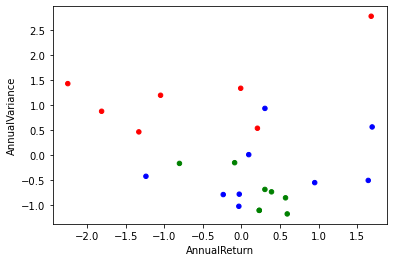

In [45]:
col = df_stocks_scaled_predictions.StockCluster.map({0:'b', 1:'r', 2:'g'})
df_stocks_scaled_predictions.plot.scatter(x='AnnualReturn', y='AnnualVariance', c=col)

In [47]:
centroids = model.cluster_centers_

In [52]:
centroids[2]

array([ 1.24187407,  1.24222615,  1.24144063,  1.24144914,  0.43273827,
        0.17814387, -0.7492309 ,  0.75      ,  0.25      ])